<a href="https://colab.research.google.com/github/barish-bit/Neural_Network-based_Climate_Data_Forecasting/blob/main/Ensamble_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras-beats

In [ ]:
# import libraries
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1000)

#print(X_train)

#nbeats = NBeatsModel(model_type = 'generic', lookback = 3, horizon = 1, batch_size=1024)

nbeats=NBeatsModel( model_type = 'generic', lookback = 3, horizon = 1,
                   num_generic_neurons = 256, num_generic_stacks = 15, num_generic_layers = 3,
                    num_trend_neurons = 256, num_trend_stacks = 3, num_trend_layers = 4, num_seasonal_neurons= 4096,
                    num_seasonal_stacks = 3, num_seasonal_layers= 4, num_harmonics= 1, polynomial_term= 2,
                    loss = 'mae', learning_rate= 0.001, batch_size = 1024)

nbeats.fit(X, y, epochs = 10, validation_data=(X_val,y_val))

Epoch 1/10
9/9 [==============================] - 34s 688ms/step - loss: 0.3710 - mae: 0.3710 - mape: 1927.7290 - val_loss: 0.1170 - val_mae: 0.1170 - val_mape: 26.8917
Epoch 2/10
9/9 [==============================] - 3s 313ms/step - loss: 0.0571 - mae: 0.0571 - mape: 14802.9463 - val_loss: 0.0336 - val_mae: 0.0336 - val_mape: 7.4792
Epoch 3/10
9/9 [==============================] - 2s 275ms/step - loss: 0.0342 - mae: 0.0342 - mape: 19701.6387 - val_loss: 0.0355 - val_mae: 0.0355 - val_mape: 8.1193
Epoch 4/10
9/9 [==============================] - 2s 272ms/step - loss: 0.0312 - mae: 0.0312 - mape: 18682.8984 - val_loss: 0.0289 - val_mae: 0.0289 - val_mape: 6.4332
Epoch 5/10
9/9 [==============================] - 3s 285ms/step - loss: 0.0292 - mae: 0.0292 - mape: 21396.1797 - val_loss: 0.0282 - val_mae: 0.0282 - val_mape: 6.2911
Epoch 6/10
9/9 [==============================] - 3s 396ms/step - loss: 0.0287 - mae: 0.0287 - mape: 20374.5605 - val_loss: 0.0295 - val_mae: 0.0295 - val_mape

In [ ]:
print(X)

[[[0.25763467]
  [0.29009258]
  [0.31646463]]

 [[0.29009258]
  [0.31646463]
  [0.32085998]]

 [[0.31646463]
  [0.32085998]
  [0.30496912]]

 ...

 [[0.56023707]
  [0.53301976]
  [0.49498314]]

 [[0.53301976]
  [0.49498314]
  [0.55922276]]

 [[0.49498314]
  [0.55922276]
  [0.56936586]]]


In [ ]:
print(len(y_val), len(y_train), len(y_test))

1000 6849 1000


In [ ]:
nbeats.evaluate(X_test, y_test)

32/32 [==============================] - 0s 12ms/step - loss: 0.0388 - mae: 0.0388 - mape: 9.4318


[0.03878399729728699, 0.03878399729728699, 9.431827545166016]

In [ ]:
df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()

,Mean_temp,norm
Dates,,
1994-01-01,18.4250,0.257635
1994-01-02,19.6250,0.290093
1994-01-03,20.6000,0.316465
1994-01-04,20.7625,0.320860
1994-01-05,20.1750,0.304969


32/32 [==============================] - 2s 17ms/step
[[0.49291929602622986], [0.5550975799560547], [0.568199872970581], [0.5703884959220886], [0.5706647634506226], [0.5604775547981262], [0.575044572353363], [0.5908341407775879], [0.5262600779533386], [0.4706884026527405], [0.4891365170478821], [0.5399616360664368], [0.5525266528129578], [0.5924210548400879], [0.5860031843185425], [0.5783295631408691], [0.5568180084228516], [0.4901618957519531], [0.47561579942703247], [0.4668027460575104], [0.49702879786491394], [0.5141209363937378], [0.4643661379814148], [0.4482172429561615], [0.4685039818286896], [0.4915368854999542], [0.4855014383792877], [0.4863537549972534], [0.5133920311927795], [0.4959498643875122], [0.5021442174911499], [0.5091105103492737], [0.5001385807991028], [0.4510497450828552], [0.3750138282775879], [0.39003458619117737], [0.4463760256767273], [0.4917075037956238], [0.5035531520843506], [0.5188204050064087], [0.5129737854003906], [0.49426907300949097], [0.505450010299682

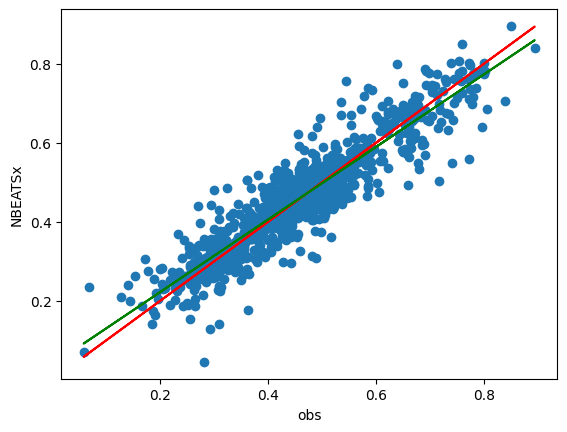

[-0.0608938124353009, -0.012239658138236575, -0.0008278813278048691, 0.0010226383828835228, 0.011442003135987977, -0.012945541630906887, -0.01426937639416348, 0.06575980778567259, 0.05629657321492121, -0.01685647060826534, -0.04946194557679362, -0.01114664646854191, -0.03847781213866397, 0.008178654704846577, 0.009199055481319496, 0.023164041716062345, 0.06758261895775108, 0.01614115212370748, 0.010385740060081305, -0.028856604983151568, -0.016211921698336296, 0.051595702953338485, 0.01739365361868961, -0.019041435855703948, -0.021745717358868433, 0.007373044647138505, 0.0003232878040148046, -0.026041706463949432, 0.019085093115393637, -0.004781035265434719, -0.0056868502189958425, 0.01007012690042175, 0.050461270509825296, 0.07744566397785468, -0.01380489866426815, -0.05490927872663376, -0.044211776751649556, -0.011052015302237539, -0.014082909609546612, 0.006932098406434495, 0.02001926028628087, -0.009842859051645836, 0.0713254490880797, -0.0518727771156714, -0.016506888542775044, -0

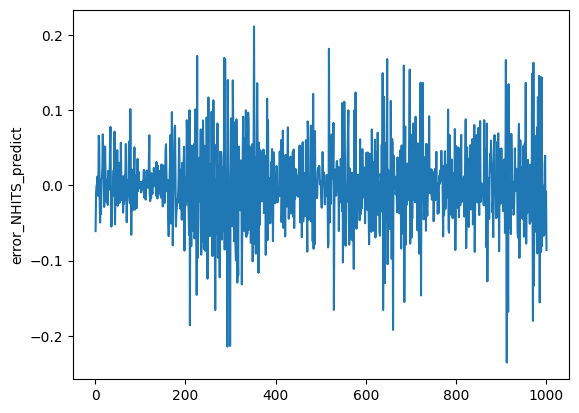

max_error 0.21090248200002426
min_error -0.23539723184798922
sd_error 0.053710461345990355
error
median 0.0007013268712109944
25_parcentile -0.025843877714551933
75_parcentile 0.027330107592097752
mae 0.03878399082958187
mse 0.0028852388047972623
var_obs 0.017198726031830026
var_exp_pred 0.01727736037396187
var_error 0.0028848136579991243
co_variance 0.015811447821718096
co_variance_matrix [[0.01721594 0.01581145]
 [0.01581145 0.01729466]]
[15, 292, 559, 127, 7]
[6, 239, 497, 104, 3]
1000
[0.4, 0.8184931506849316, 0.889087656529517, 0.8188976377952756, 0.42857142857142855]


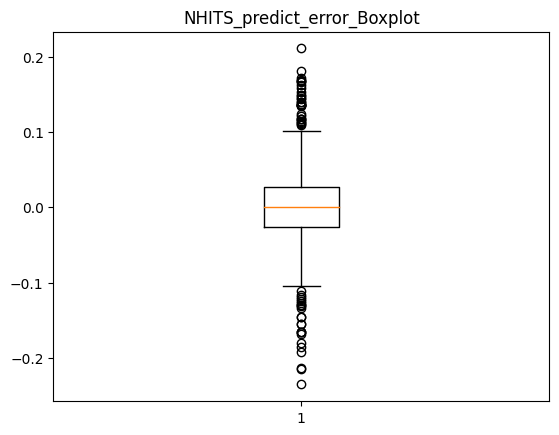

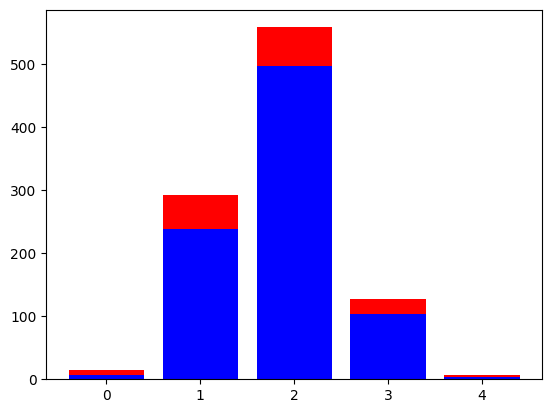

value of proportion of explained variable: 0.8322658519787953
value of correlation (skill score): 0.9172438404450666


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

forecasts=nbeats.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





#df=pd.read_csv('/content/deep3.csv')
df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model.fit(obs, np.array(exp_pred))
y_pred = model.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###############


list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)

plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

In [ ]:
import pandas as pd
from kerasbeats import prep_time_series, NBeatsModel
d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1000)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


model = Sequential()
model.add(LSTM(400, activation='relu', input_shape=(3, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

model.fit(X_train,y_train,epochs=10, validation_data=(X_val,y_val), batch_size=1024)
model.evaluate(X_test,y_test)

Epoch 1/10
7/7 [==============================] - 4s 408ms/step - loss: 0.4317 - val_loss: 0.3485
Epoch 2/10
7/7 [==============================] - 4s 551ms/step - loss: 0.2949 - val_loss: 0.1852
Epoch 3/10
7/7 [==============================] - 5s 798ms/step - loss: 0.1105 - val_loss: 0.0965
Epoch 4/10
7/7 [==============================] - 4s 522ms/step - loss: 0.0933 - val_loss: 0.0547
Epoch 5/10
7/7 [==============================] - 3s 491ms/step - loss: 0.0638 - val_loss: 0.0657
Epoch 6/10
7/7 [==============================] - 6s 813ms/step - loss: 0.0585 - val_loss: 0.0550
Epoch 7/10
7/7 [==============================] - 4s 585ms/step - loss: 0.0551 - val_loss: 0.0491
Epoch 8/10
7/7 [==============================] - 4s 616ms/step - loss: 0.0502 - val_loss: 0.0467
Epoch 9/10
7/7 [==============================] - 4s 664ms/step - loss: 0.0468 - val_loss: 0.0439
Epoch 10/10
32/32 [==============================] - 0s 7ms/step - loss: 0.0467


0.046733882278203964

32/32 [==============================] - 0s 7ms/step
[[0.5270329713821411], [0.520668625831604], [0.5109284520149231], [0.5376049280166626], [0.5431435704231262], [0.5423197746276855], [0.5422564148902893], [0.5441290140151978], [0.5434126257896423], [0.5262309908866882], [0.49230748414993286], [0.48355257511138916], [0.5035109519958496], [0.531460165977478], [0.5443645715713501], [0.5567607283592224], [0.5491750836372375], [0.5313707590103149], [0.505859911441803], [0.47667455673217773], [0.4736219048500061], [0.4798657298088074], [0.48750942945480347], [0.4802074432373047], [0.46110057830810547], [0.46336740255355835], [0.475067138671875], [0.48230475187301636], [0.4843454957008362], [0.4881832003593445], [0.49510812759399414], [0.4909318685531616], [0.49360644817352295], [0.48687541484832764], [0.4612288475036621], [0.4285663366317749], [0.41271018981933594], [0.43726646900177], [0.46971797943115234], [0.4914811849594116], [0.49850839376449585], [0.4998866319656372], [0.495118618011

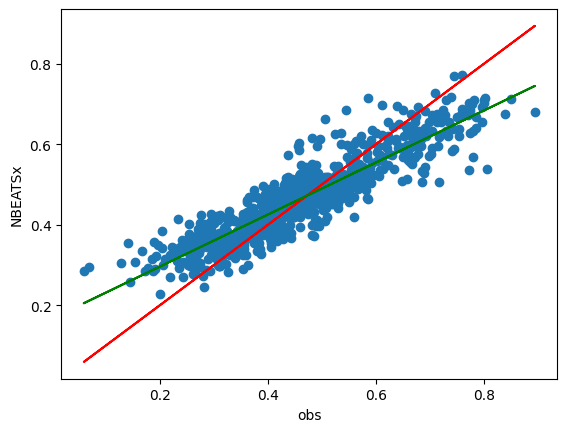

[-0.026780137079389643, -0.04666861226268726, -0.05809930228346283, -0.0317609295225425, -0.01607918989150836, -0.03110332180134756, -0.04705753385723721, 0.01905468102328245, 0.07344912105122492, 0.038686117625682415, -0.04629097847474284, -0.06755570742358952, -0.08749351295577212, -0.052782234157763286, -0.03243955726587289, 0.0015952069344156161, 0.05993969417213707, 0.0573500153820693, 0.04062985207485181, -0.01898479430848421, -0.03961881471324413, 0.017340496368408065, 0.04053694509207828, 0.012948764425439241, -0.02914912087945254, -0.02079643829925737, -0.010111011903397915, -0.030090709588186493, -0.009961442376549723, -0.012547699293602443, -0.012722940116151604, -0.00810851489569031, 0.04392913788424546, 0.1132713337433271, 0.07241012056180607, -0.016377528286036225, -0.07787761260904091, -0.0654930500960913, -0.047918082262744854, -0.020407121640562575, 0.005553868650386096, -0.004225300095499596, 0.06099405679987169, -0.006649898659555675, -0.028422333870533834, -0.056469

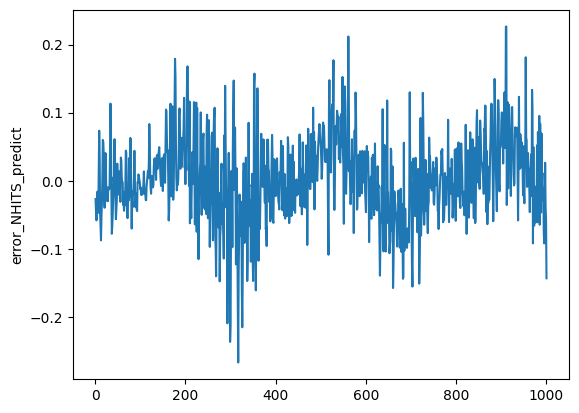

max_error 0.22646698696815498
min_error -0.26675506965509965
sd_error 0.0613305069253046
error
median -0.0019478514301983219
25_parcentile -0.03312994129782032
75_parcentile 0.040560171837771664
mae 0.04673388797438703
mse 0.0037692474114303155
var_obs 0.017198726031830026
var_exp_pred 0.00880192320000294
var_error 0.0037614310797148354
co_variance 0.011130739815874941
co_variance_matrix [[0.01721594 0.01113074]
 [0.01113074 0.00881073]]
[[0.19576177643420417, 0.18933781485864265, 0.16769920744622613, 0.1905211762015091, 0.17733514980956783, 0.12712681854794577, 0.15451318105428524, 0.14183430952357245, 0.18612583407086275, 0.19271884726683314, 0.06897306112707696, 0.05916806714332573, 0.14377840315828183, 0.17319338510953564, 0.18683021582256865], [0.37360408110500054, 0.38881872694185604, 0.3942283787949604, 0.39422837879495987, 0.38814252046021813, 0.378337526476467, 0.37394218434581994, 0.3560227125824126, 0.36785632601107776, 0.37461839082745785, 0.3894949334234943, 0.381042352403

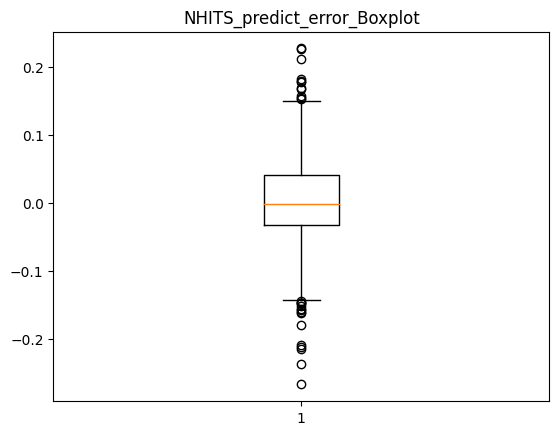

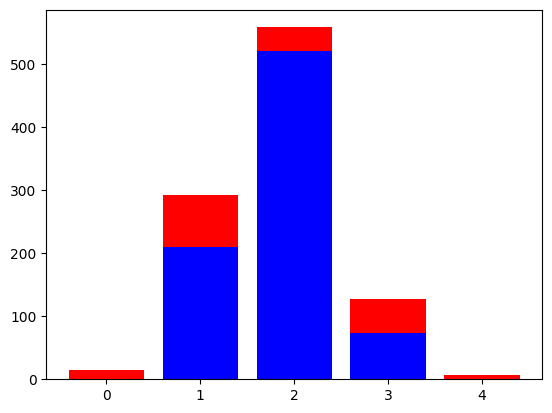

value of proportion of explained variable: 0.7812959475746355
value of correlation (skill score): 0.9046635751115024


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()


forecasts=model.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

mmodel = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
mmodel.fit(obs, np.array(exp_pred))
y_pred = mmodel.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###########

list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
print(list_obs)
print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


'''df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.to_csv("norm.csv")
dataframe = pd.read_csv('/content/norm.csv', usecols=[2], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


train1,val1,test1 = dataset[:-2003],dataset[-2003:-1003],dataset[-1003:]
print(len(train1),len(val1) ,len(test1))






import numpy as np

train=[]
for i in range (len(train1)):
  train.append(train1[i][0])

val=[]
for i in range (len(val1)):
  val.append(val1[i][0])


test=[]
for i in range (len(test1)):
  test.append(test1[i][0])


# convert an array of values into a dataset matrix
def create_dataset(dataset):
 dataX, dataY, dataZ, dataW = [], [],[], []
 for i in range(len(dataset)-3):
   a = dataset[i:(i+2)]
   dataX.append(dataset[(i)])
   dataY.append(dataset[(i + 1)])
   dataZ.append(dataset[(i+2)])
   dataW.append(dataset[i+3])

 return np.array(dataX), np.array(dataY), np.array(dataZ), np.array(dataW)


# reshape into X=t and Y=t+1
#look_back = 1
trainX1,trainX2, trainX3, trainY = create_dataset(train)
valX1, valX2,valX3, valY = create_dataset(val)
testX1, testX2,testX3, testY = create_dataset(test)
trainX2



trainX=[]
for i in range (len(trainX1)):
  trainX.append([trainX1[i],trainX2[i], trainX3[i]])
trainX=pd.DataFrame(trainX)
#print(trainX)


valX=[]
for i in range (len(valX1)):
  valX.append([valX1[i],valX2[i], valX3[i]])
valX=pd.DataFrame(valX)


testX=[]
for i in range (len(testX1)):
  testX.append([testX1[i],testX2[i],testX3[i]])
testX=pd.DataFrame(testX)
#print(testX)'''

d=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(d)
d = scaler.transform(d)
X, y = prep_time_series(d, lookback = 3, horizon = 1)
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=1000)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1000)




import math

from keras import models
from keras import layers
# create and fit Multilayer Perceptron model
model1 = Sequential()
model1.add(layers.Dense(32, input_shape=(3,), activation='relu'))
model1.add(layers.Dense(32, activation='relu'))

#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.1))
model1.add(layers.Dense(16, activation='relu'))

model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(4, activation='relu'))
model1.add(layers.Dense(1))



#model.compile(loss='mean_squared_error', optimizer='adam')
model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])
model1.fit(X_train, y_train, epochs=10, batch_size=1024, validation_data=(X_val,y_val))
# Estimate model performance
trainScore = model1.evaluate(X_train, y_train)
print(trainScore)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
testScore = model1.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
# generate predictions for training
trainPredict = model1.predict(X_train)
testPredict = model1.predict(X_test)





Epoch 1/10
7/7 [==============================] - 2s 49ms/step - loss: 0.2277 - mse: 0.2277 - val_loss: 0.1977 - val_mse: 0.1977
Epoch 2/10
7/7 [==============================] - 0s 10ms/step - loss: 0.1621 - mse: 0.1621 - val_loss: 0.1265 - val_mse: 0.1265
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0972 - mse: 0.0972 - val_loss: 0.0686 - val_mse: 0.0686
Epoch 4/10
7/7 [==============================] - 0s 14ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0263 - val_mse: 0.0263
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 8/10
7/7 [==============================] - 0s 13ms/step - loss: 0.0078 - mse: 0.0078 - val

32/32 [==============================] - 0s 1ms/step
[[0.4928405284881592], [0.4960099458694458], [0.5053627490997314], [0.5119898915290833], [0.513212263584137], [0.51094651222229], [0.512654721736908], [0.5182209610939026], [0.5064168572425842], [0.4833577275276184], [0.4741872549057007], [0.48590415716171265], [0.49864572286605835], [0.5135481357574463], [0.519465446472168], [0.5190639495849609], [0.5121946930885315], [0.4922710657119751], [0.4761095643043518], [0.46726036071777344], [0.47210121154785156], [0.4809020161628723], [0.4736502766609192], [0.4624614119529724], [0.4614831805229187], [0.4694371819496155], [0.47314998507499695], [0.4738183617591858], [0.4801250994205475], [0.48045802116394043], [0.48066020011901855], [0.48230302333831787], [0.4818040132522583], [0.4689413607120514], [0.44191986322402954], [0.42953693866729736], [0.4407190680503845], [0.46206626296043396], [0.4762503504753113], [0.484759658575058], [0.48666810989379883], [0.48210155963897705], [0.481209427118

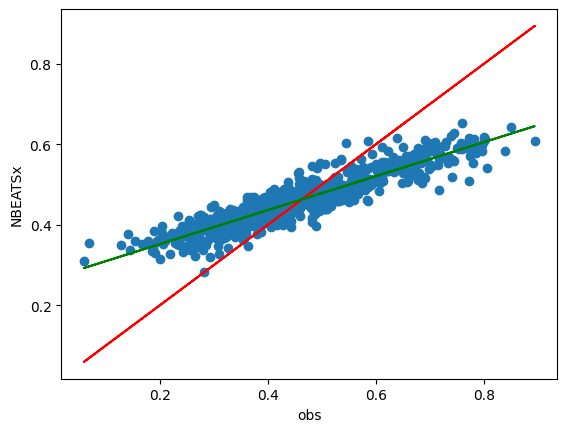

[-0.06097257997337158, -0.07132729222484546, -0.06366500519865448, -0.05737596601012185, -0.04601049673049762, -0.06247658420674307, -0.07665922701061856, -0.006853371898012717, 0.036453352504166814, -0.00418714573338741, -0.06441120771897502, -0.06520412537326603, -0.09235874208556338, -0.07069426437779502, -0.057338682365055016, -0.03610157183984586, 0.022959303623431015, 0.018250322083729453, 0.010879504937400641, -0.028398990322888507, -0.041139508015398674, 0.018376782722473006, 0.026677792298194003, -0.0047972668588930345, -0.028766518664639307, -0.01472665890320024, -0.012028165500275967, -0.03857709970201706, -0.01418183865683842, -0.020272878489006496, -0.02717086759112719, -0.01673736011053406, 0.03212670296298081, 0.09533727960705085, 0.0531011362821735, -0.015406926250513764, -0.04986873437799233, -0.04069325613742736, -0.04138571121858592, -0.027128648024916213, -0.006286415220310926, -0.022010372422159752, 0.04708486590669847, -0.021687584292261364, -0.0381487986189164, -

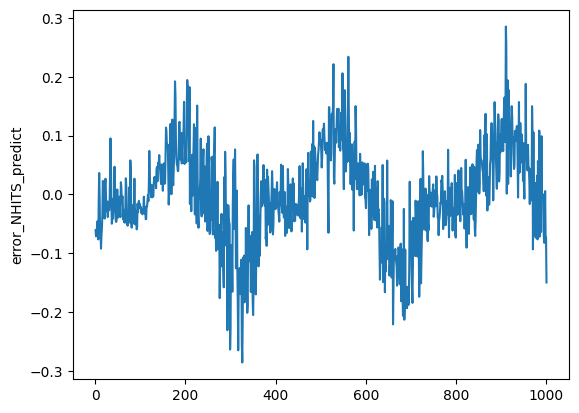

max_error 0.28575715752183356
min_error -0.2860389412557226
sd_error 0.07935277864494858
error
median -0.0038665652604342182
25_parcentile -0.04499004395441439
75_parcentile 0.05104837506371454
mae 0.06127850092011671
mse 0.006297192277270199
var_obs 0.017198726031830026
var_exp_pred 0.0036280600650227543
var_error 0.006296863478674208
co_variance 0.00727223354263192
co_variance_matrix [[0.01721594 0.00727223]
 [0.00727223 0.00363169]]
[[0.19576177643420417, 0.18933781485864265, 0.16769920744622613, 0.1905211762015091, 0.17733514980956783, 0.12712681854794577, 0.15451318105428524, 0.14183430952357245, 0.18612583407086275, 0.19271884726683314, 0.06897306112707696, 0.05916806714332573, 0.14377840315828183, 0.17319338510953564, 0.18683021582256865], [0.37360408110500054, 0.38881872694185604, 0.3942283787949604, 0.39422837879495987, 0.38814252046021813, 0.378337526476467, 0.37394218434581994, 0.3560227125824126, 0.36785632601107776, 0.37461839082745785, 0.3894949334234943, 0.38104235240301

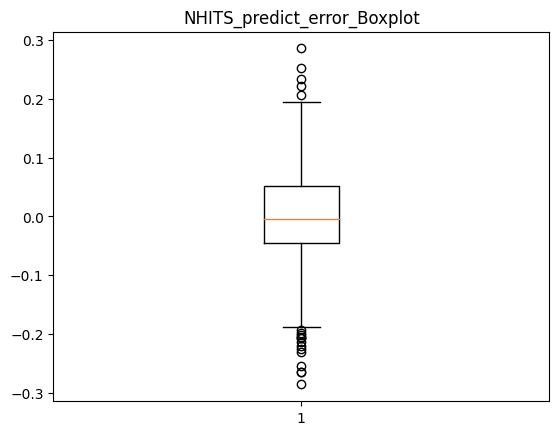

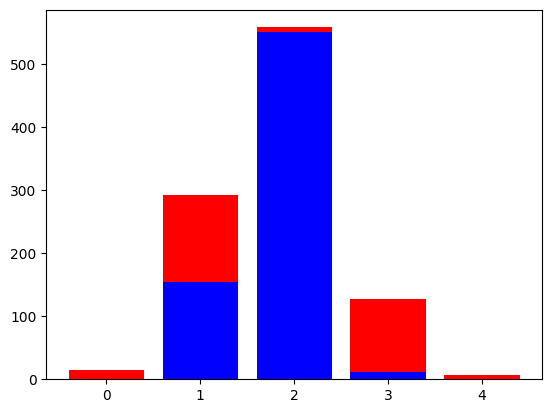

value of proportion of explained variable: 0.6338761680940509
value of correlation (skill score): 0.9206243213436339


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

forecasts=model1.predict(X_test)
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()
exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

model2 = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
model2.fit(obs, np.array(exp_pred))
y_pred = model2.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


#########



list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
print(list_obs)
print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 1. Train Base Models
ann_val_predictions = np.array(model1.predict(X_val))
lstm_val_predictions = np.array(model.predict(X_val))
nbeats_val_predictions = np.array(nbeats.predict(X_val))
validation_targets = np.array(y_val)

# 2. Train Meta-Model
stacked_features = np.column_stack((ann_val_predictions, lstm_val_predictions, nbeats_val_predictions))

meta_model = Sequential([
    Dense(64, activation='relu', input_shape=(3,)),  # Adjust input shape according to your data
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for ensemble prediction
])

meta_model.compile(optimizer='adam', loss='mse')

meta_model.fit(stacked_features, validation_targets, epochs=50, batch_size=32, verbose=0)

# 3. Make Ensemble Predictions
ann_test_predictions = model1.predict(X_test)
lstm_test_predictions = model.predict(X_test)
nbeats_test_predictions = nbeats.predict(X_test)

stacked_test_features = np.column_stack((ann_test_predictions, lstm_test_predictions, nbeats_test_predictions))

ensemble_predictions = meta_model.predict(stacked_test_features)
#print(ensemble_predictions)


32/32 [==============================] - 0s 2ms/step


[[0.4991541802883148], [0.5469303131103516], [0.5565153360366821], [0.5639927983283997], [0.5653871297836304], [0.5570516586303711], [0.5685400366783142], [0.5818407535552979], [0.5299909114837646], [0.4803834855556488], [0.4875134825706482], [0.5270518064498901], [0.542132556438446], [0.5801205635070801], [0.5783095955848694], [0.574597954750061], [0.5556454658508301], [0.49771106243133545], [0.47962313890457153], [0.46627992391586304], [0.4900341033935547], [0.5056813955307007], [0.4671472907066345], [0.4517447352409363], [0.46404892206192017], [0.4835234582424164], [0.48138993978500366], [0.4834616482257843], [0.5058287382125854], [0.4928925931453705], [0.4990377724170685], [0.5039457082748413], [0.4973350167274475], [0.45599499344825745], [0.3882823586463928], [0.3925580084323883], [0.435266375541687], [0.47797292470932007], [0.4949600100517273], [0.511968731880188], [0.508904755115509], [0.49391457438468933], [0.5017009973526001], [0.4417159855365753], [0.4829883873462677], [0.495

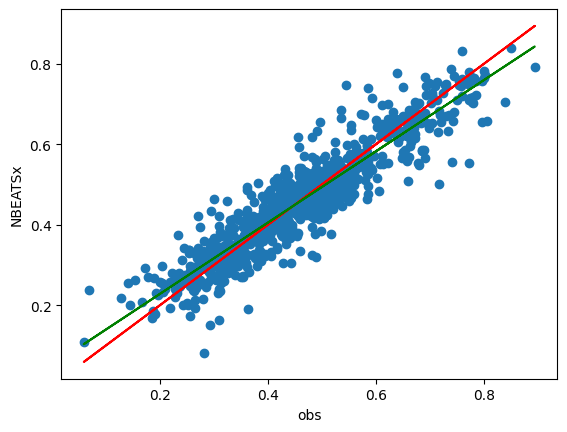

[-0.05465892817321594, -0.0204069249839397, -0.012512418261703795, -0.005373059210805442, 0.0061643694689957895, -0.016371437798662014, -0.020773912069212308, 0.05676642056338255, 0.060027406745347234, -0.007161387705357014, -0.05108498005402751, -0.02405647608508854, -0.04887190851317569, -0.004121836628161235, 0.0015054667476464, 0.01943243332525424, 0.0664100763857296, 0.023690318803089805, 0.014393079537620368, -0.029379427124798907, -0.02320661616969555, 0.043156162090301375, 0.020174806343909335, -0.015513943570929167, -0.026200777125637842, -0.0006403826103993371, -0.003788210790269253, -0.02893381323541855, 0.011521800135199545, -0.007838306507576442, -0.008793295293077263, 0.004905324825989377, 0.04765770643817002, 0.0823909123432569, -0.0005363682954632187, -0.05238585648542282, -0.05532142688668984, -0.02478659438854125, -0.022676051642169903, 8.04252802137917e-05, 0.01595023000139928, -0.010197357676447472, 0.06757643614099718, -0.04515268124279237, -0.021799751196507344, -

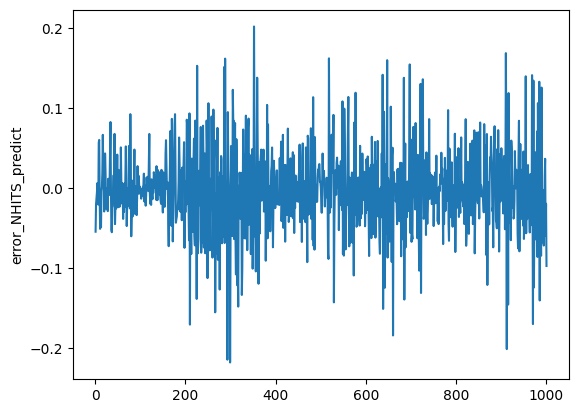

max_error 0.2018217143684935
min_error -0.21808673814216883
sd_error 0.05113354920773328
error
median -0.0012206278859978603
25_parcentile -0.029682606398132194
75_parcentile 0.023047681847460477
mae 0.03733101878495526
mse 0.0026186412770768217
var_obs 0.017198726031830026
var_exp_pred 0.015883195424209753
var_error 0.002614639854579681
co_variance 0.015248889690420465
co_variance_matrix [[0.01721594 0.01524889]
 [0.01524889 0.01589909]]
[15, 292, 559, 127, 7]
[4, 244, 502, 105, 1]
1000
[0.26666666666666666, 0.8356164383561644, 0.8980322003577818, 0.8267716535433071, 0.14285714285714285]


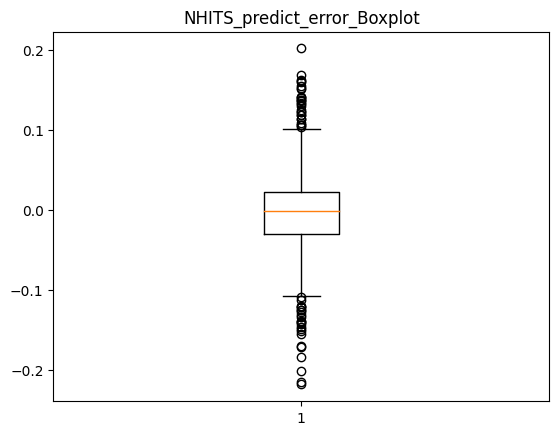

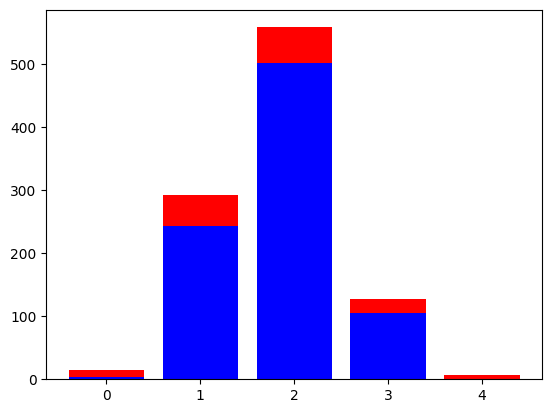

value of proportion of explained variable: 0.8479747947760365
value of correlation (skill score): 0.922616344109281


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()


forecasts=ensemble_predictions
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

mmodel = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
mmodel.fit(obs, np.array(exp_pred))
y_pred = mmodel.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###########

list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

In [ ]:
ann_test_predictions = model1.predict(X_test)
lstm_test_predictions = model.predict(X_test)
nbeats_test_predictions = nbeats.predict(X_test)

avg_pred=(ann_test_predictions+ lstm_test_predictions + nbeats_test_predictions)/3

#print(avg_pred)

32/32 [==============================] - 0s 9ms/step


[[0.5042642951011658], [0.5239253640174866], [0.5281636714935303], [0.539994478225708], [0.5423402190208435], [0.5379145741462708], [0.5433185696601868], [0.5510613918304443], [0.5253632068634033], [0.4934256970882416], [0.4852104187011719], [0.5031394362449646], [0.5182278156280518], [0.545809805393219], [0.5499444007873535], [0.5513847470283508], [0.5393959283828735], [0.504601240158081], [0.48586177825927734], [0.4702458679676056], [0.4809173047542572], [0.49162957072257996], [0.47517529129981995], [0.4636286795139313], [0.4636959135532379], [0.47478047013282776], [0.477906197309494], [0.48082563281059265], [0.4926208555698395], [0.48819699883461], [0.4926375150680542], [0.49411511421203613], [0.4918496608734131], [0.46895551681518555], [0.4260541498661041], [0.4160459339618683], [0.4332684278488159], [0.46368011832237244], [0.48317384719848633], [0.4983537495136261], [0.49938344955444336], [0.4920857846736908], [0.4939260184764862], [0.4601319134235382], [0.47709545493125916], [0.4

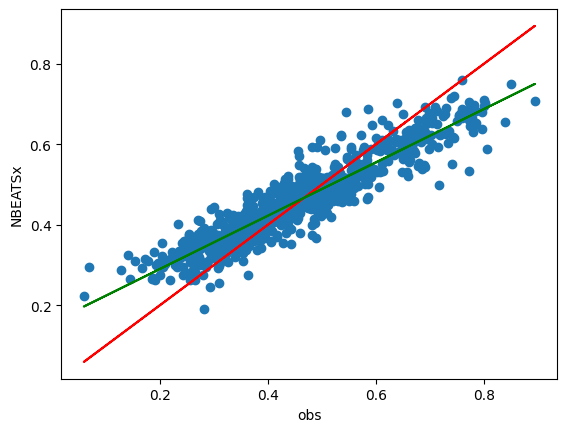

[-0.049548813360364985, -0.04341187407680469, -0.04086408280485565, -0.029371379313497092, -0.016882541293791076, -0.035508522282762356, -0.04599537908733975, 0.02598705883852903, 0.055399702124985906, 0.005880823827235759, -0.053388043923503825, -0.04796884629001408, -0.07277664932356998, -0.03843259474202232, -0.02685972804986947, -0.003780774396455966, 0.050160538917773057, 0.03058049652983541, 0.02063171889232618, -0.025413483073056353, -0.032323414808993034, 0.029104337282180648, 0.02820280693709476, -0.003629999297934172, -0.026553785634320093, -0.00938337071998796, -0.0072719532657788966, -0.0315698286506102, -0.001686082507546427, -0.01253390081833694, -0.015193552642091546, -0.004925269236815799, 0.0421723505841356, 0.095351435710185, 0.037235422924248085, -0.02889793095594284, -0.05731937457956093, -0.03907940077548888, -0.03446221449541087, -0.013534557086348098, 0.0064289244403336054, -0.012026147387446007, 0.059801457264883284, -0.02673675335582948, -0.02769268361151589, -

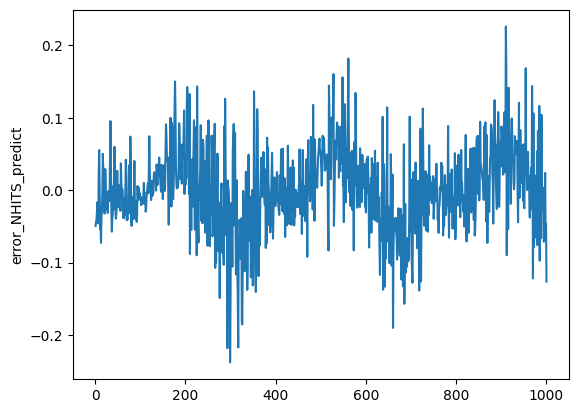

max_error 0.2260755631500379
min_error -0.23799218610206874
sd_error 0.0570698030288441
error
median -0.0019310404113231927
25_parcentile -0.03166991222575263
75_parcentile 0.034827048026818186
mae 0.043496707560250356
mse 0.0032578804321533425
var_obs 0.017198726031830026
var_exp_pred 0.008845040875839063
var_error 0.0032569624177510637
co_variance 0.011404807052011018
co_variance_matrix [[0.01721594 0.01140481]
 [0.01140481 0.00885389]]
[15, 292, 559, 127, 7]
[0, 215, 535, 84, 0]
1000
[0.0, 0.7363013698630136, 0.9570661896243292, 0.6614173228346457, 0.0]


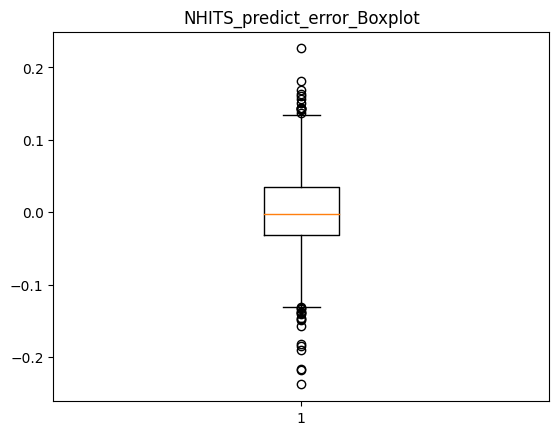

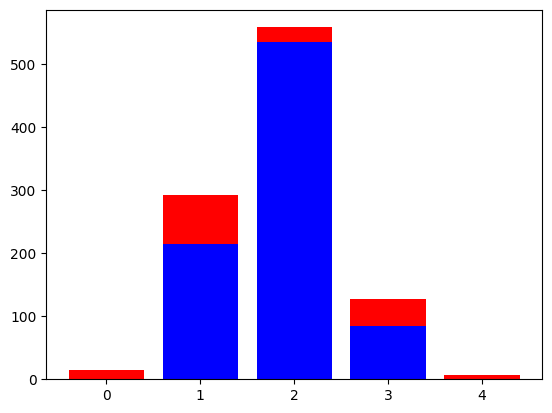

value of proportion of explained variable: 0.8106276934859398
value of correlation (skill score): 0.9246766285903051


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()


forecasts=avg_pred
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

mmodel = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
mmodel.fit(obs, np.array(exp_pred))
y_pred = mmodel.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###########

list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()



#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

In [ ]:
import numpy as np


ann_val_predictions = np.array(model1.predict(X_val))
lstm_val_predictions = np.array(model.predict(X_val))
nbeats_val_predictions = np.array(nbeats.predict(X_val))
# Assuming you have validation set predictions for each model (ann_val_predictions, lstm_val_predictions, nbeats_val_predictions)
# Compute variance of predictions for each model
ann_variance = np.var(ann_val_predictions)
lstm_variance = np.var(lstm_val_predictions)
nbeats_variance = np.var(nbeats_val_predictions)

# Compute inverse of variance (to use higher confidence as higher weight)
ann_weight = 1 / ann_variance
lstm_weight = 1 / lstm_variance
nbeats_weight = 1 / nbeats_variance

# Normalize weights to ensure they sum up to 1
total_weights = ann_weight + lstm_weight + nbeats_weight
ann_weight /= total_weights
lstm_weight /= total_weights
nbeats_weight /= total_weights

# Now, ann_weight, lstm_weight, and nbeats_weight contain the computed weights based on model confidence.
ensemble_predictions_boosted = (ann_val_predictions * ann_weight +
                                lstm_val_predictions * lstm_weight +
                                nbeats_val_predictions * nbeats_weight)

32/32 [==============================] - 0s 8ms/step


[[0.4192552864551544], [0.6653480529785156], [0.4181424379348755], [0.4069829285144806], [0.39657434821128845], [0.47304439544677734], [0.36914435029029846], [0.38894525170326233], [0.6396498084068298], [0.6347358226776123], [0.545080304145813], [0.5238129496574402], [0.4048442542552948], [0.40605369210243225], [0.6314945816993713], [0.4884992837905884], [0.45821213722229004], [0.5133920907974243], [0.5013148188591003], [0.48535794019699097], [0.6284988522529602], [0.49042201042175293], [0.42322343587875366], [0.3852018117904663], [0.487485408782959], [0.5949497222900391], [0.4646173417568207], [0.44880831241607666], [0.33454227447509766], [0.502223014831543], [0.46195951104164124], [0.424543559551239], [0.5999658107757568], [0.6335809826850891], [0.5423274040222168], [0.4044339656829834], [0.3645053207874298], [0.6244500875473022], [0.5670445561408997], [0.46370729804039], [0.38296136260032654], [0.6104110479354858], [0.38276052474975586], [0.35432204604148865], [0.6722233295440674], 

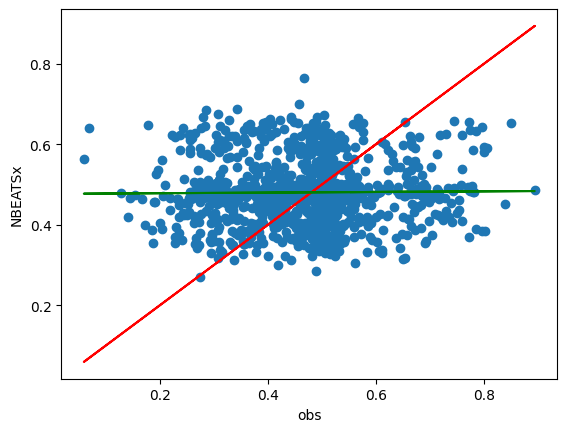

[-0.13455782200637634, 0.09801081488422436, -0.15088531636351044, -0.1623829290247245, -0.16264841210334613, -0.10037870098225576, -0.22016959845722806, -0.13612908128865298, 0.16968630366841242, 0.1471909494166065, 0.006481841521137288, -0.027295332877538492, -0.18616021069632693, -0.17818870803280906, 0.05469045286214835, -0.06666623763421842, -0.03102325224281044, 0.03937134716917867, 0.03608475949214918, -0.010301410843670977, 0.11525813268970997, 0.02789677698135362, -0.023749048483971524, -0.08205686702139914, -0.0027642904045990235, 0.11078588143722334, -0.020560808818452236, -0.06358714904512619, -0.15976466360228825, 0.001492115178596043, -0.04587155666850451, -0.07449682389761292, 0.15028850048647935, 0.25997690158008857, 0.15350867708036076, -0.04050989923482773, -0.12608248164094704, 0.12169056844944093, 0.04940849444700246, -0.04818100855958418, -0.10999316251378322, 0.10629911587434904, -0.05136403646184706, -0.13254662073787904, 0.16743519100129234, 0.01154594483100857, 

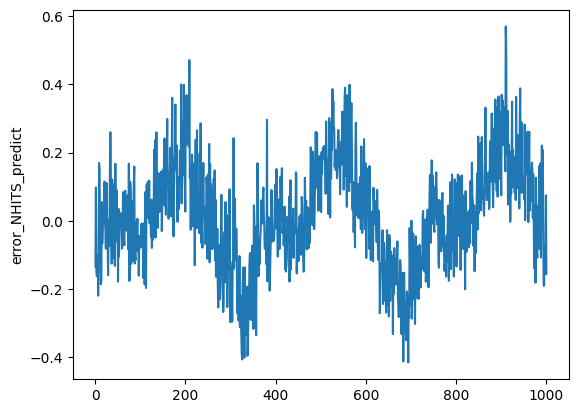

max_error 0.5703323516422407
min_error -0.41617768408276723
sd_error 0.15441241577919146
error
median 0.01416440114926154
25_parcentile -0.08275651568157821
75_parcentile 0.12237035972583682
mae 0.12293049597812929
mse 0.02411478331245782
var_obs 0.017198726031830026
var_exp_pred 0.006911961312932492
var_error 0.023843194146765893
co_variance 0.00013388047947779052
co_variance_matrix [[0.01721594 0.00013388]
 [0.00013388 0.00691888]]
[15, 292, 559, 127, 7]
[0, 49, 407, 14, 0]
1000
[0.0, 0.1678082191780822, 0.7280858676207513, 0.11023622047244094, 0.0]


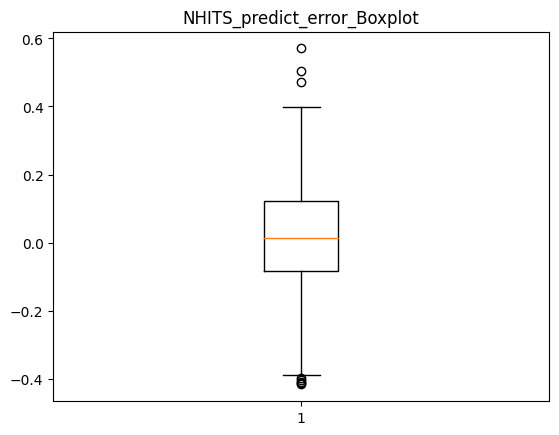

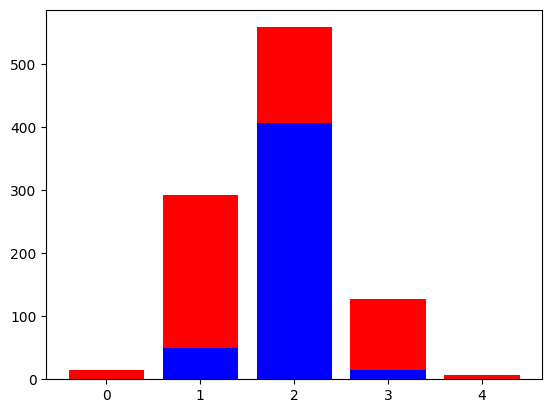

value of proportion of explained variable: -0.3863349007733955
value of correlation (skill score): 0.012279154689102045


In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()


forecasts=ensemble_predictions_boosted
exp_pred=forecasts.tolist()
print(exp_pred)
pred=[]
for i in range (len(exp_pred)):
  pred.append(exp_pred[i][0])
print(pred)
print(df["norm"][-1000:].tolist())





df=pd.read_csv("/content/final_output2.csv",index_col='Dates',parse_dates=True)
df['norm']=d
df.head()
#df1=pd.read_csv("/content/final_output2.csv")
obs=df["norm"][-1000:].tolist()

exp_pred=pred





#perfect prediction and recent prediction

plt.scatter(obs, exp_pred)
plt.plot(obs,obs, color='r')

mmodel = LinearRegression()
obs = np.array(obs).reshape(-1, 1)
mmodel.fit(obs, np.array(exp_pred))
y_pred = mmodel.predict(obs)
plt.plot(obs,y_pred, color='g')


plt.xlabel("obs")
plt.ylabel("NBEATSx")
plt.show()




obs=df["norm"][-1000:].tolist()
exp_pred=pred


error=[]
for i in range (len(obs)):
  error.append(exp_pred[i]-obs[i])
print(error)


list1=[]
for i in range (len(obs)):
  list1.append(i+1)
plt.plot(list1,error)
plt.ylabel('error_NHITS_predict')
plt.show()

# information of error

print("max_error", np.max(error))
print("min_error", np.min(error))
print("sd_error", np.std(error))




#error box plot



plt.boxplot(error)
#plt.title("error-Boxplot")
#plt.show()


print("error")
print("median",np.median(error))
print("25_parcentile",np.percentile(error,25))
print("75_parcentile",np.percentile(error,75))

plt.title('NHITS_predict_error_Boxplot')



from sklearn.metrics import mean_squared_error, mean_absolute_error

mae=mean_absolute_error(obs, exp_pred)
mse=mean_squared_error(obs, exp_pred)
var_obs=np.var(obs)
var_exp_pred=np.var(exp_pred)
var_error=np.var(error)
cov=np.cov(obs,exp_pred)[0,1]
cov_matrix=np.cov(obs,exp_pred)

print("mae",mae)
print("mse",mse)
print("var_obs",var_obs)
print("var_exp_pred",var_exp_pred)
print("var_error",var_error)
print("co_variance",cov)
print("co_variance_matrix",cov_matrix)


###########

list_obs=[]
list_pred=[]
list_pred1=[]
for i in range (5):
  list_obs.append([])
  list_pred.append([])
  list_pred1.append([])

for i in range (5):
  for j in range (len(obs)):
    if obs[j]>i*0.2 and obs[j]<=(i+1)*0.2:
      list_obs[i].append(obs[j])
      a=obs.index(obs[j])
      list_pred[i].append(pred[a])
#print(list_obs)
#print(list_pred)


for i in range (5):
  for j in range (len(list_pred[i])):
    if list_pred[i][j]>i*0.2 and list_pred[i][j]<=(i+1)*0.2:
      list_pred1[i].append(list_pred[i][j])

len_obs=[]
len_pred=[]
for i in range (5):
  len_obs.append(len(list_obs[i]))
  len_pred.append(len(list_pred1[i]))
print(len_obs)
print(len_pred)
print(np.sum(len_obs))


prop_list=[]
for i in range (5):
  prop_list.append(len_pred[i]/len_obs[i])
print(prop_list)



plt.show()

plt.bar(range(0,5), len_obs, color='r')
plt.bar(range(0,5), len_pred,color='b')

plt.show()




#Proportion of explained variable (parcent of P-variance) (best=1)

print("value of proportion of explained variable:",(((var_obs)-(var_error))/(var_obs)))

# corelation (skill score) (ideally 1)
#correlation--insensitive to symmetric error where mse works

print("value of correlation (skill score):",((cov)/(var_obs*var_exp_pred)**(1/2)) )

Meta model ensamble

mae 0.03751186103972859

mse 0.002638122808784673

[0.2, 0.8356164383561644, 0.8998211091234347, 0.8346456692913385, 0.2857142857142857]

AVG Model

mae 0.041457751034046565

mse 0.0030237478850598585

[0.0, 0.7191780821917808, 0.9499105545617174, 0.7716535433070866, 0.0]

Confidence model (Var)

mae 0.1287187380946891

mse 0.026590811732012876

[0.0, 0.2568493150684932, 0.6404293381037567, 0.18110236220472442, 0.0]